In [6]:
import numpy as np
from qiskit import IBMQ
from qiskit import QuantumCircuit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.opflow.primitive_ops import PauliOp
from qiskit.opflow.list_ops import SummedOp
from qiskit.quantum_info import Pauli
from qiskit.algorithms import VQE

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Identification Measurement basis -- Quantum circuit 

Because all of these are two qubit measurements, each of them have 4 possible outcomes. The vectors that form the bases are ordered in a way that for each of the measurement circuits the first element corresponds to the one that outputs $(00)$ in the clasical register, the second $(01)$, the third $(10)$ and the fourth $(11)$.

$$\text{Classical Register} =\{(00),(01),(10),(11) \}.$$


To determine which vector corresponded to which output we initialized the circuit with the four different posibilities and saw (without measuring) to which final state each of them went. Here we show a pictorical example for the case of the Bell Measurement. Througout this notebook all quantum states have been written without normalization constants for the sake of readability.

## Bell circuit

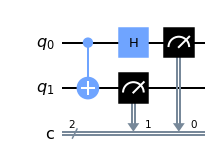

In [17]:
qc = QuantumCircuit(2,2)
qc.cnot(0,1)
qc.h(0)
qc.measure([1,0],[1,0])
qc.draw(output='mpl')

### Test with initial state $|\psi\rangle = |00\rangle+|11\rangle$.

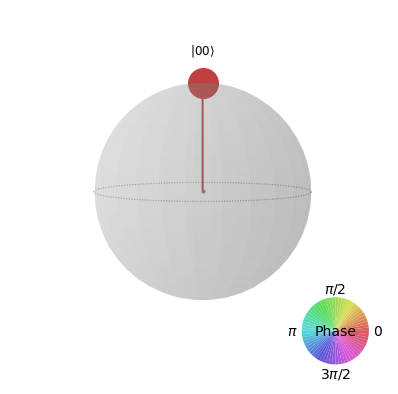

In [13]:
qc = QuantumCircuit(2)
initial_state = [+1/np.sqrt(2), 0, 0, +1/np.sqrt(2)] 
qc.initialize(initial_state)
qc.cnot(0,1)
qc.h(0)
statevec = Statevector.from_instruction(qc).data
qc.draw(output='mpl')
plot_state_qsphere(statevec)

### Test with initial state $|\psi\rangle = |00\rangle-|11\rangle$.

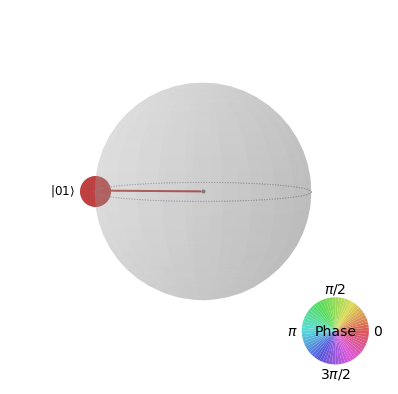

In [15]:
qc = QuantumCircuit(2)
initial_state = [+1/np.sqrt(2), 0, 0, -1/np.sqrt(2)] 
qc.initialize(initial_state)
qc.cnot(0,1)
qc.h(0)
statevec = Statevector.from_instruction(qc).data
qc.draw(output='mpl')
plot_state_qsphere(statevec)

### Test with initial state $|\psi\rangle = |01\rangle +|10\rangle$.

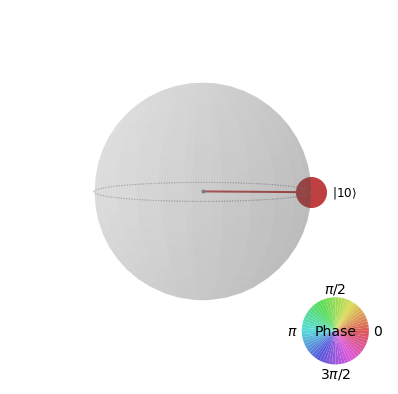

In [16]:
qc = QuantumCircuit(2)
initial_state = [0, +1/np.sqrt(2), +1/np.sqrt(2), 0] 
qc.initialize(initial_state)
qc.cnot(0,1)
qc.h(0)
statevec = Statevector.from_instruction(qc).data
qc.draw(output='mpl')
plot_state_qsphere(statevec)

Following the convention we defined, the elements of the Bell basis will be ordered in the following way.

$$    Bell \mapsto 4 \hspace{.5cm} Str_4=\{II,XX,YY,ZZ\} \\ 
|\Phi_0\rangle = |00\rangle + |11\rangle \\ |\Phi_1\rangle = |00\rangle-|11\rangle\\
   |\Phi_2\rangle = |01\rangle + |10\rangle \\ |\Phi_3\rangle = |01\rangle-|10\rangle$$

### Expectation values

Finally, not only the way in which the vectors get ordered matters, but also the expectation values of the operators with respect to such order. We have chosen for that the following notation.

$\langle XX \rangle = |\Phi_0\rangle\langle\Phi_0| - |\Phi_1\rangle\langle\Phi_1|+|\Phi_2\rangle\langle\Phi_2|-|\Phi_3\rangle\langle\Phi_3| \implies \hspace{0.2cm}  \{ XX \mapsto [+,-,+,-]\}.$

The reason for this perhaps obscure notation is that $[+,-,+,-]$ is how the information of the expectation value of each operator will enter the code. For the complete Bell basis we have:

 $$    Bell \mapsto 4: \hspace{0.5cm} \text{Expectation values} \hspace{0.2cm} =  \{ XX \mapsto [+,-,+,-]; \hspace{0.5cm} YY \mapsto [-,+,+,-] ; \hspace{0.5cm}ZZ \mapsto [+,+,-,-]\}$$
 

## $\Omega^{XX}$ circuit

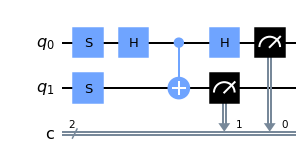

In [3]:
qc = QuantumCircuit(2, 2)
qc.s((0,1))
qc.h(0)
qc.cnot(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

  
   $$ \Omega^X \mapsto 5 \hspace{.5cm} Str_5=\{II,XX,YZ,ZY\} = \{(0,0),(1,1),(2,3),(3,2)\}  \\ 
   |\Omega^{XX}_0\rangle= +|00\rangle-i|01\rangle-i|10\rangle+|11\rangle \hspace{1cm} \text{Ref} = \Omega^{XX}_2\\
   |\Omega^{XX}_1\rangle= +|00\rangle-i|01\rangle+i|10\rangle-|11\rangle \hspace{1cm} \text{Ref} = \Omega^{XX}_0\\
   |\Omega^{XX}_2\rangle= +|00\rangle+i|01\rangle-i|10\rangle-|11\rangle \hspace{1cm} \text{Ref} = \Omega^{XX}_3\\
   |\Omega^{XX}_3\rangle= -|00\rangle-i|01\rangle-i|10\rangle-|11\rangle \hspace{1cm} \text{Ref} = \Omega^{XX}_1$$
   
   $$ \Omega^X \mapsto 5: \hspace{0.5cm} \text{Expectation values} \hspace{0.5cm} =  \{ XX \mapsto [+,-,-,+]; \hspace{0.5cm} YZ \mapsto [-,+,-,+] ; \hspace{0.5cm}ZY \mapsto [-,-,+,+]\}$$

## $\Omega^{YY}$ circuit

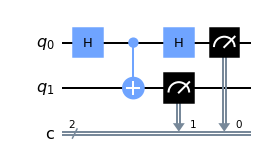

In [4]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cnot(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

 $$ \Omega^Y\mapsto 6 \hspace{.5cm}  Str_6=\{II,YY,XZ,ZX\} = \{(0,0),(2,2),(1,3),(3,1)\}  \\ 
   |\Omega^{YY}_0\rangle= +|00\rangle+|01\rangle+|10\rangle-|11\rangle  \hspace{1cm} \text{Ref} = \Omega^{YY}_2\\
   |\Omega^{YY}_1\rangle= +|00\rangle+|01\rangle-|10\rangle+|11\rangle  \hspace{1cm} \text{Ref} = \Omega^{YY}_0\\
   |\Omega^{YY}_2\rangle= +|00\rangle-|01\rangle+|10\rangle+|11\rangle  \hspace{1cm} \text{Ref} = \Omega^{YY}_3\\
   |\Omega^{YY}_3\rangle= -|00\rangle+|01\rangle+|10\rangle+|11\rangle  \hspace{1cm} \text{Ref} = \Omega^{YY}_1$$
   
 $$ \Omega^Y\mapsto 6: \hspace{.5cm}\text{Expectation values} \hspace{0.5cm} =  \{ YY \mapsto [+,-,-,+]; \hspace{0.5cm} XZ \mapsto [+,-,+,-] ; \hspace{0.5cm} ZX \mapsto [+,+,-,-]\}$$

## $\Omega^{ZZ}$ circuit

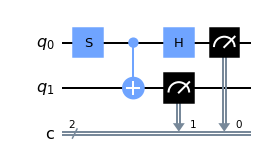

In [5]:
qc = QuantumCircuit(2, 2)
qc.s(0)
qc.cnot(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

 $$ \Omega^z\mapsto 7 \hspace{.5cm}  Str_7=\{II,ZZ,XY,YX\} = \{(0,0),(3,3),(1,2),(2,1)\}  \\ 
   |\Omega^{ZZ}_{0}\rangle= +|00\rangle - i|11\rangle \hspace{1cm} \text{Ref} = \Omega^{ZZ}_2\\
   |\Omega^{ZZ}_{1}\rangle= +|00\rangle + i|11\rangle \hspace{1cm} \text{Ref} = \Omega^{ZZ}_3\\
   |\Omega^{ZZ}_{2}\rangle= +|01\rangle + i|10\rangle \hspace{1cm} \text{Ref} = \Omega^{ZZ}_1\\
   |\Omega^{ZZ}_{3}\rangle= +|00\rangle - i|10\rangle \hspace{1cm} \text{Ref} = \Omega^{ZZ}_0$$
   
$$ \Omega^z\mapsto 7: \hspace{.5cm}\text{Expectation values} \hspace{0.2cm} =  \{ ZZ \mapsto [+,+,-,-]; \hspace{0.5cm} XY \mapsto [-,+,-,+] ; \hspace{0.5cm} YX \mapsto [-,+,+,-]\}$$   

## $\chi$ circuit

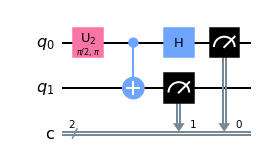

In [11]:
qc = QuantumCircuit(2, 2)
qc.u2(np.pi/2,np.pi,0)
qc.cnot(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

 $$  \chi\mapsto 8 \hspace{.5cm}  Str_8=\{II,XY,YX,ZX\} = \{(0,0),(1,2),(2,1),(3,1)\}  \\ 
   |\chi_0\rangle= -|00\rangle+|01\rangle-i|10\rangle+i|11\rangle \hspace{1cm} \text{Ref} = \chi_1\\
   |\chi_1\rangle= +|00\rangle+|01\rangle+i|10\rangle-i|11\rangle \hspace{1cm} \text{Ref} = \chi_0\\
   |\chi_2\rangle= +|00\rangle-|01\rangle+i|10\rangle+i|11\rangle \hspace{1cm} \text{Ref} = \chi_2\\
   |\chi_3\rangle= -|00\rangle+|01\rangle+i|10\rangle+i|11\rangle \hspace{1cm} \text{Ref} = \chi_3$$
   
$$ \chi\mapsto 8: \hspace{.5cm}\text{Expectation values} \hspace{0.2cm} =  \{ XY \mapsto [+,-,+,-]; \hspace{0.5cm} YZ \mapsto [-,+,+,-] ; \hspace{0.5cm} ZX \mapsto [+,+,-,-]\}$$    
   

## $\chi'$ circuit

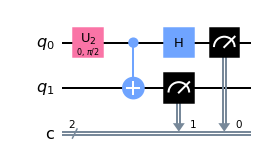

In [7]:
qc = QuantumCircuit(2, 2)
qc.u2(0,np.pi/2,0)
qc.cnot(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

 $$  \chi' \mapsto 9 \hspace{.5cm}  Str_9=\{II,YX,ZY,XZ\} = \{(0,0),(2,1),(3,2),(1,3)\}  \\ 
   |\chi'_0\rangle= +i|00\rangle-|01\rangle+i|10\rangle+|11\rangle \hspace{1cm} \text{Gab} = \chi'_3\\
   |\chi'_1\rangle= +|00\rangle+i|01\rangle-|10\rangle+i|11\rangle \hspace{1cm} \text{Gab} = \chi'_1\\
   |\chi'_2\rangle= +i|00\rangle+|01\rangle+i|10\rangle-|11\rangle \hspace{1cm} \text{Gab} = \chi'_2\\
   |\chi'_3\rangle= -|00\rangle+i|01\rangle+|10\rangle+i|11\rangle \hspace{1cm} \text{Gab} = \chi'_0
   $$
   
$$ \chi' \mapsto 9: \hspace{.5cm} \text{Expectation values} \hspace{0.2cm} =  \{ YX \mapsto [-,+,+,-]; \hspace{0.5cm} ZY \mapsto [+,+,-,-] ; \hspace{0.5cm} XZ \mapsto [+,-,+,-]\}$$    
   
   

# Sumary of expectation values in all entangled bases.

   $$    Bell \mapsto 4: \hspace{0.5cm} \text{Expectation values} \hspace{0.2cm} =  \{ XX \mapsto [+,-,+,-]; \hspace{0.5cm} YY \mapsto [-,+,+,-] ; \hspace{0.5cm}ZZ \mapsto [+,+,-,-]\}$$
   
   $$ \chi\mapsto 8: \hspace{.5cm}\text{Expectation values} \hspace{0.2cm} =  \{ XY \mapsto [+,-,+,-]; \hspace{0.5cm} YZ \mapsto [-,+,+,-] ; \hspace{0.5cm} ZX \mapsto [+,+,-,-]\}$$ 

   $$ \chi' \mapsto 9: \hspace{.5cm} \text{Expectation values} \hspace{0.2cm} =  \{ XZ \mapsto [+,-,+,-]; \hspace{0.5cm} YX \mapsto [-,+,+,-] ; \hspace{0.5cm} ZY \mapsto [+,+,-,-]\}$$    

  $$ \Omega^X \mapsto 5: \hspace{0.5cm} \text{Expectation values} \hspace{0.2cm} =  \{ YZ \mapsto [-,+,-,+]; \hspace{0.5cm} XX \mapsto [+,-,-,+] ; \hspace{0.5cm}ZY \mapsto [-,-,+,+]\}$$
  
   $$ \Omega^Y\mapsto 6: \hspace{.5cm}\text{Expectation values} \hspace{0.2cm} =  \{XZ \mapsto [+,-,+,-]; \hspace{0.5cm} YY \mapsto [+,-,-,+] ; \hspace{0.5cm} ZX \mapsto [+,+,-,-]\}$$
   
   $$ \Omega^z\mapsto 7: \hspace{.5cm}\text{Expectation values} \hspace{0.2cm} =  \{ XY \mapsto [-,+,-,+]; \hspace{0.5cm} YX \mapsto [-,+,+,-] ; \hspace{0.5cm} ZZ \mapsto [+,+,-,-]\}$$
   


In [1]:
import qiskit.tools.jupyter
%qiskit_version_table